In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


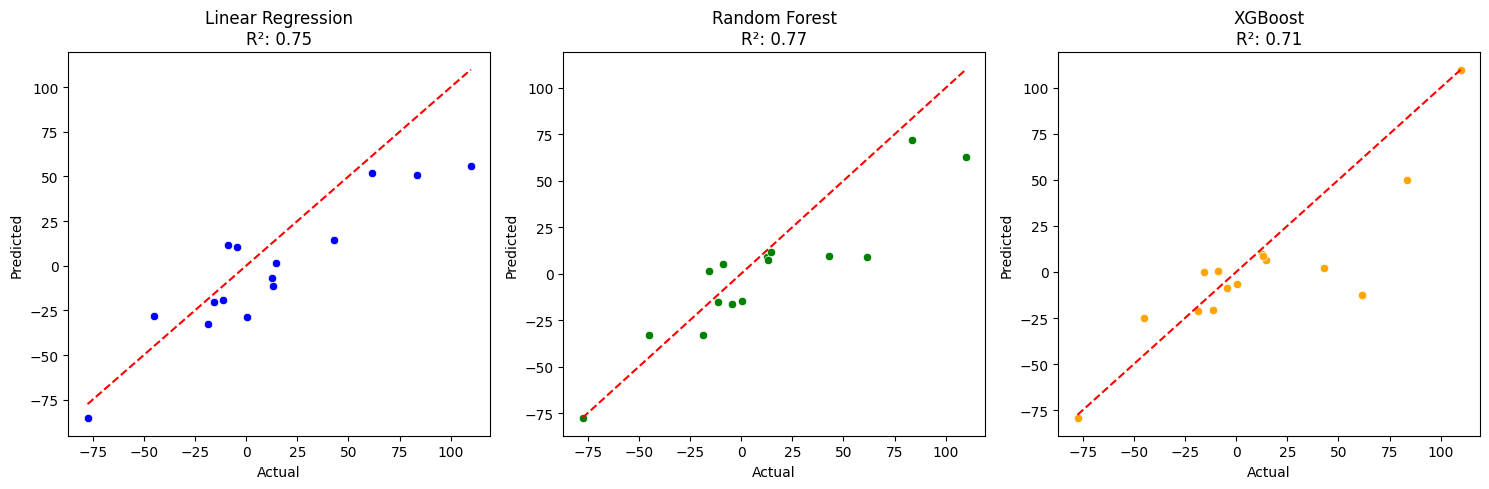

(0.7491319671160247, 0.7685516071149219, 0.7138299927158913)

In [3]:
# Load the soil features file again
features_df = pd.read_csv('/content/merged (1).csv')
credits_df = pd.read_csv('/content/carbon_credits.csv')

# Merge on year and month
merged = pd.merge(features_df, credits_df[['year', 'month', 'Carbon_Credits_ha']],
                  on=['year', 'month'], how='inner')

# Rename for consistency
merged = merged.rename(columns={'Carbon_Credits_ha': 'Carbon_Credits'})

# Drop NA rows
merged = merged.dropna(subset=['BD', 'Soil_Moisture_%', 'pH', 'CEC', 'SOC_stock', 'Carbon_Credits'])

# Step 1: Standardize features
from sklearn.preprocessing import StandardScaler
features = ['BD', 'Soil_Moisture_%', 'pH', 'CEC', 'SOC_stock']
X = merged[features]
y = merged['Carbon_Credits']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: PCA transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Step 4: Train models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

lr = LinearRegression().fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

# Evaluate R² scores
lr_r2 = r2_score(y_test, lr_preds)
rf_r2 = r2_score(y_test, rf_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Linear
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=lr_preds, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Linear Regression\nR²: {lr_r2:.2f}")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=rf_preds, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Random Forest\nR²: {rf_r2:.2f}")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# XGBoost
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=xgb_preds, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"XGBoost\nR²: {xgb_r2:.2f}")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

# Return R² scores
lr_r2, rf_r2, xgb_r2


In [4]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb, 'xgb_carbon_credit_model.pkl')

# Also save the PCA transformer and scaler
joblib.dump(pca, 'pca_transform.pkl')
joblib.dump(scaler, 'scaler.pkl')

# If using Colab, download to local machine
from google.colab import files
files.download('xgb_carbon_credit_model.pkl')
files.download('pca_transform.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>